<a href="https://colab.research.google.com/github/CrillyPienaah/CrillyPienaah/blob/main/Pienaah_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAI6000 - Module 4 Assignment
### Christopher Crilly Pienaah

## Objective
This notebook evaluates multiple classifiers on six 2D datasets using 10-fold cross-validation. The classifiers are:
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Naïve Bayes (Gaussian)
- K-Nearest Neighbours (K = 1 to 20)

Performance metrics: **Accuracy**, **Precision**, and **Recall**.

We also visualize the datasets, identify the best classifier for each, and justify our decisions using mathematical and algorithmic reasoning.

## How the Classifiers Were Implemented

All classifiers were implemented using **Scikit-learn**, a widely used Python library for machine learning.  
- **LDA** and **QDA** were imported from `sklearn.discriminant_analysis`  
- **Gaussian Naive Bayes** was used from `sklearn.naive_bayes`, chosen because the datasets are continuous and numeric, aligning with the Gaussian distribution assumption  
- **k-Nearest Neighbors (k = 1 to 20)** was implemented with `sklearn.neighbors.KNeighborsClassifier`, using the default **Euclidean distance**  
- We used `StratifiedKFold(n_splits=10)` for 10-fold cross-validation  
- Evaluation metrics (**Accuracy**, **Precision**, and **Recall**) were calculated using `cross_validate()` from `sklearn.model_selection`


In [ ]:
# Step 1: Load all datasets
import pandas as pd

# define file paths
file_paths = {
    'circles0.3': 'circles0.3.csv', 'moons1': 'moons1.csv', 'spiral1': 'spiral1.csv', 'twogaussians33':'twogaussians33.csv',
    'twogaussians42':'twogaussians42.csv', 'halfkernel': 'halfkernel.csv'}

# load datasets into a dictionary
datasets = {name:pd.read_csv(path) for name, path in file_paths.items()}

# Preview the first few rows of each dataset
for name, df in datasets.items():
    print(f"---{name} ---")
    print(df.head(), "\n")


---circles0.3 ---
         x1        x2  label
0 -1.047089  0.149405      0
1 -0.417893 -0.064341      1
2 -0.873634  0.810346      0
3 -0.845811  0.439035      0
4  0.844557  0.484532      0 

---moons1 ---
         x1        x2  label
0 -0.674481  0.469321      0
1  0.566712 -0.284153      1
2 -0.257384  0.230913      1
3  1.868980  0.610969      1
4 -0.579194  0.842457      0 

---spiral1 ---
         x         y  label
0 -1.60023   7.69407    0.0
1  7.03777   9.76350    1.0
2  9.29608  -9.16002    0.0
3  3.95189  12.31531    1.0
4  0.56410   4.34127    0.0 

---twogaussians33 ---
         x1        x2  label
0  1.744896 -1.543012      1
1 -1.237847  1.693372      0
2 -0.567432 -0.253311      0
3  0.571967 -0.030068      1
4 -1.047860  0.798137      0 

---twogaussians42 ---
         x1        x2  label
0  0.601034  1.535353      1
1  0.755945 -1.172352      0
2  1.354479 -0.948528      0
3  3.103090  0.233485      0
4  0.753178  0.787514      1 

---halfkernel ---
     x1     x2  l

## Dataset Loading

Each dataset is loaded from a CSV file into a Pandas DataFrame.
All datasets contain two features (e.g., `x1` and `x2`) and a binary class label (`label`).
We store all datasets in a dictionary for easy access in later steps.


## Step 2: Dataset Visualization

Each dataset is plotted in 2D using its two features.
Points are colored and shaped based on their class label (`label = 0` or `1`) to help us understand the structure and potential separability of the data.


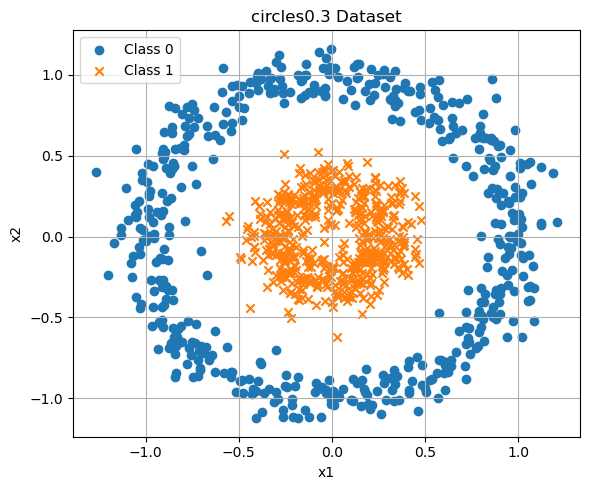

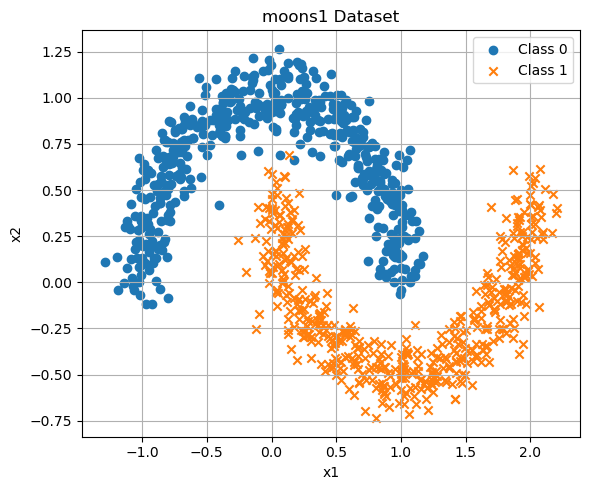

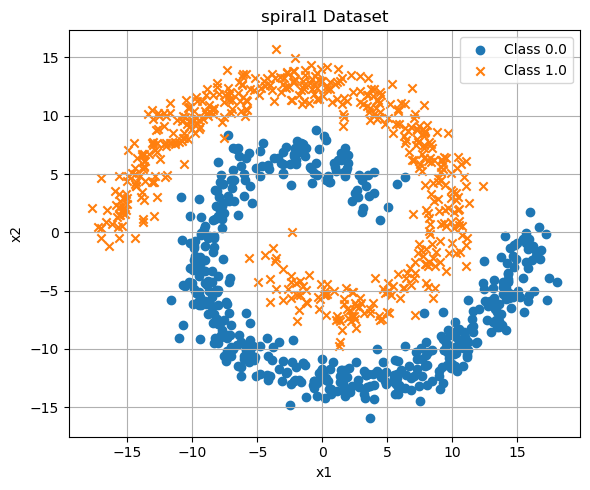

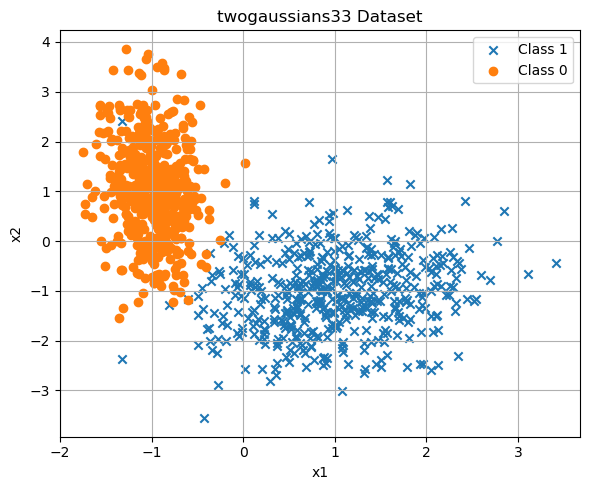

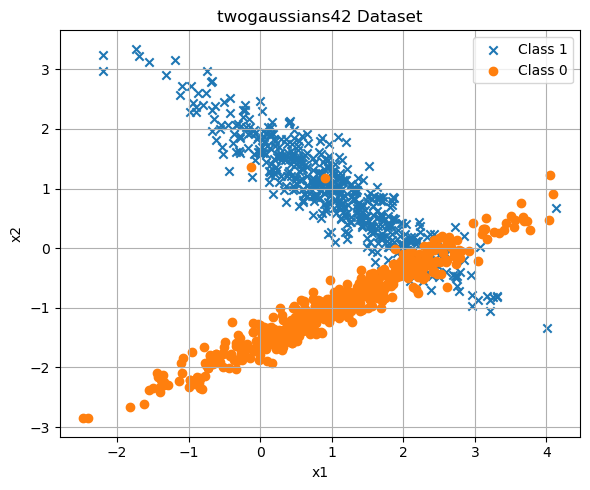

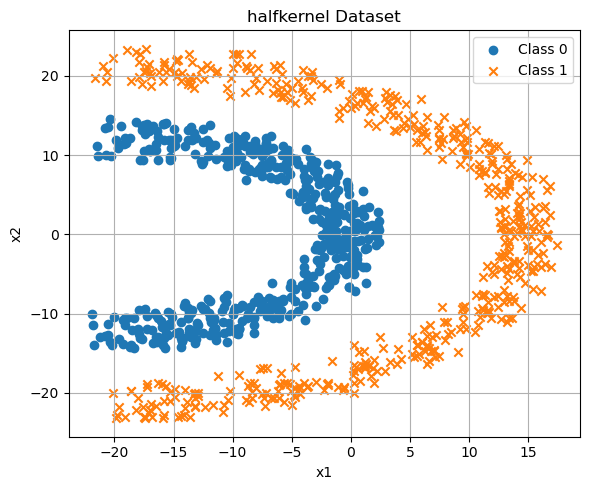

In [ ]:
# Step 2: Visualize each dataset in 2D
import matplotlib.pyplot as plt

# Define a function to plot each dataset
def plot_dataset(df, title):   # ✅ fixed function name
    plt.figure(figsize=(6, 5))
    for label in df['label'].unique():   # ✅ correct indentation starts here
        subset = df[df['label'] == label]   # ✅ indented inside the loop
        plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1],
                    label=f'Class {label}',
                    marker='o' if label == 0 else 'x')
    plt.title(f'{title} Dataset')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loop through and plot each dataset
for name, df in datasets.items():
    plot_dataset(df, name)


## Step 3: Train LDA, QDA, and Naïve Bayes with Cross-Validation

We evaluate the performance of:
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Gaussian Naïve Bayes (GNB)

Each model is run using 10-fold cross-validation.
We calculate three metrics:
- Accuracy
- Precision
- Recall

**Note:** We use Gaussian Naïve Bayes because the datasets are continuous and numeric, which aligns with the Gaussian assumption.


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Define classifiers
classifiers = {
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'NaiveBayes': GaussianNB()
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Storage for results
results = []

# 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run cross-validation for each dataset and classifier
for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1].values
    y = df['label'].values

    for clf_name, clf in classifiers.items():
        scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
        results.append({
            'Dataset': dataset_name,
            'Classifier': clf_name,
            'Accuracy': np.mean(scores['test_accuracy']),
            'Precision': np.mean(scores['test_precision']),
            'Recall': np.mean(scores['test_recall']),
        })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
results_df.sort_values(by='Dataset', inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Dataset,Classifier,Accuracy,Precision,Recall
0,circles0.3,LDA,0.452,0.452853,0.472000
1,circles0.3,QDA,0.992,1.000000,0.984000
2,circles0.3,NaiveBayes,0.992,1.000000,0.984000
3,halfkernel,LDA,0.670,0.680960,0.646000
4,halfkernel,QDA,0.939,0.960290,0.916000
5,halfkernel,NaiveBayes,0.946,0.966518,0.924000
6,moons1,QDA,0.879,0.880130,0.878000
7,moons1,LDA,0.879,0.879974,0.878000
8,moons1,NaiveBayes,0.884,0.885670,0.882000
9,spiral1,LDA,0.748,0.750448,0.746000


## Step 4: k-NN Classification (k = 1 to 20)

We apply the k-Nearest Neighbors classifier on all datasets, using values of k from 1 to 20.  
For each `k`, we perform 10-fold cross-validation and calculate:
- Accuracy
- Precision
- Recall

We then identify the best value of `k` for each dataset (based on highest accuracy) and plot Accuracy vs. k.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Store results in a dictionary of dataframes
knn_results = {}

# Loop through each dataset
for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1].values
    y = df['label'].values

    # Store results for this dataset
    knn_results[dataset_name] = {
        'k': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': []
    }

    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_validate(knn, X, y, cv=10, scoring=scoring)

        knn_results[dataset_name]['k'].append(k)
        knn_results[dataset_name]['Accuracy'].append(np.mean(scores['test_accuracy']))
        knn_results[dataset_name]['Precision'].append(np.mean(scores['test_precision']))
        knn_results[dataset_name]['Recall'].append(np.mean(scores['test_recall']))

# Convert each result dictionary to DataFrame
knn_dfs = {name: pd.DataFrame(results) for name, results in knn_results.items()}

### Step 4.1: Display Results for k-NN
# Display the first few rows of k-NN results for each dataset
for dataset_name, df in knn_dfs.items():
    print(f"--- k-NN results for {dataset_name} ---")
    print(df.head(), "\n")  # Shows k = 1 to 5



--- k-NN results for circles0.3 ---
   k  Accuracy  Precision  Recall
0  1       1.0        1.0     1.0
1  2       1.0        1.0     1.0
2  3       1.0        1.0     1.0
3  4       1.0        1.0     1.0
4  5       1.0        1.0     1.0 

--- k-NN results for moons1 ---
   k  Accuracy  Precision  Recall
0  1     0.996   0.994118   0.998
1  2     0.999   1.000000   0.998
2  3     0.997   0.996078   0.998
3  4     0.997   0.996078   0.998
4  5     0.997   0.996078   0.998 

--- k-NN results for spiral1 ---
   k  Accuracy  Precision  Recall
0  1     0.995   0.994118   0.996
1  2     0.994   0.996078   0.992
2  3     0.995   0.994193   0.996
3  4     0.994   0.996078   0.992
4  5     0.995   0.994193   0.996 

--- k-NN results for twogaussians33 ---
   k  Accuracy  Precision    Recall
0  1     0.988   0.992118  0.984039
1  2     0.986   0.996039  0.976039
2  3     0.990   0.992118  0.988039
3  4     0.987   0.995998  0.978078
4  5     0.990   0.994078  0.986078 

--- k-NN results for tw

In [ ]:
### Step 4.2: Find Best k (Highest Accuracy)
# Find best k (based on accuracy) for each dataset
best_k_summary = []

for dataset_name, df in knn_dfs.items():
    best_row = df.loc[df['Accuracy'].idxmax()]
    best_k_summary.append({
        'Dataset': dataset_name,
        'Best k': int(best_row['k']),
        'Best Accuracy': round(best_row['Accuracy'], 3)
    })

# Convert to DataFrame and show
best_k_df = pd.DataFrame(best_k_summary)
best_k_df


,Dataset,Best k,Best Accuracy
0,circles0.3,1,1.000
1,moons1,2,0.999
2,spiral1,5,0.995
3,twogaussians33,11,0.991
4,twogaussians42,15,0.947
5,halfkernel,1,1.000


## Step 4.3: Accuracy vs. k (Visualization)

To identify the best `k` for k-NN, we plot Accuracy vs. k (1 to 20) for each dataset.

This allows us to visually compare how model performance changes with the number of neighbors and helps confirm the best `k` selected numerically.


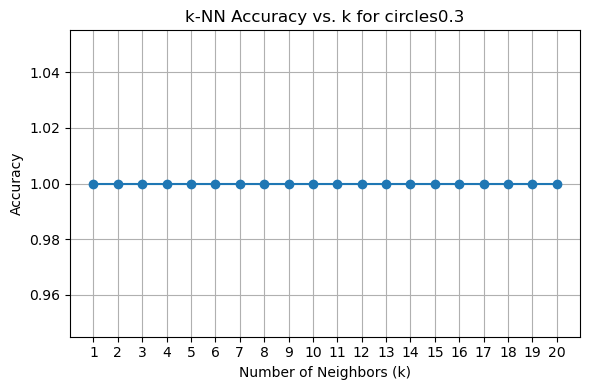

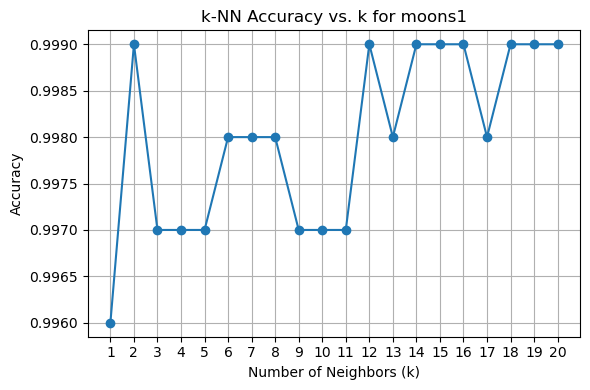

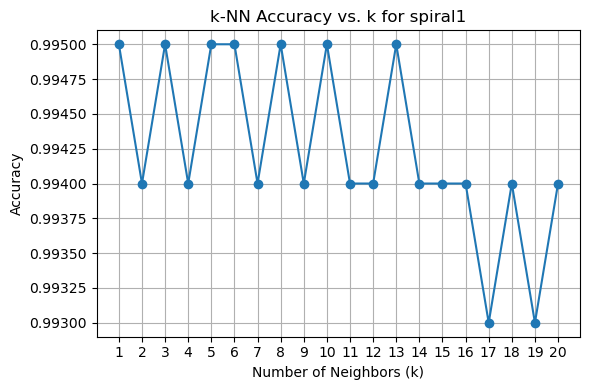

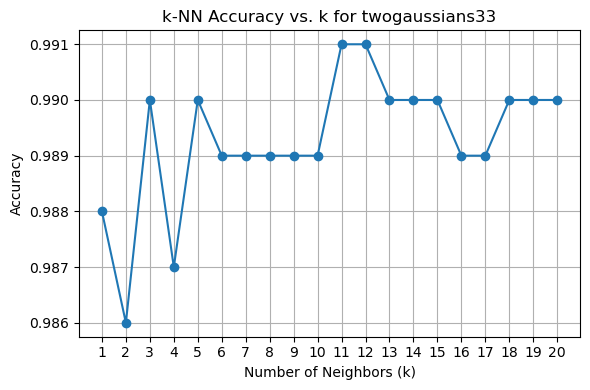

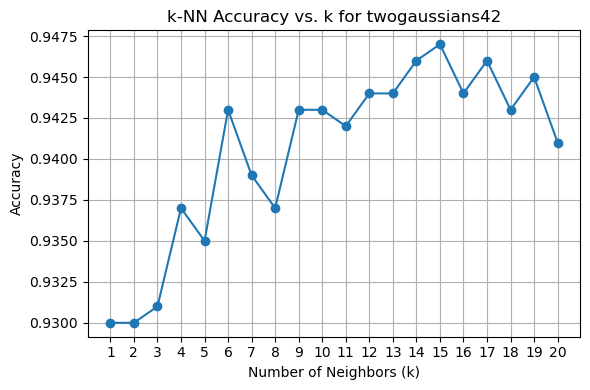

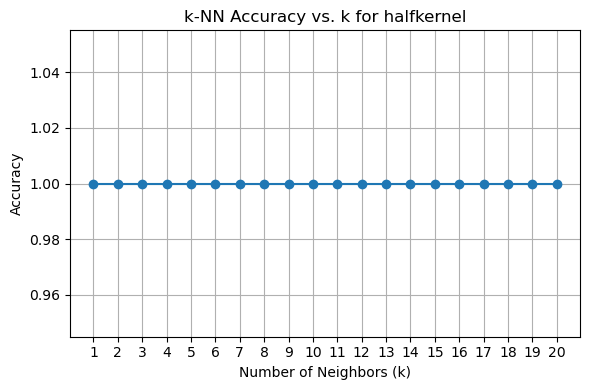

In [ ]:
# Plot Accuracy vs k for each dataset
import matplotlib.pyplot as plt

for dataset_name, df in knn_dfs.items():
    plt.figure(figsize=(6, 4))
    plt.plot(df['k'], df['Accuracy'], marker='o')
    plt.title(f'k-NN Accuracy vs. k for {dataset_name}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, 21))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Step 5: Performance Discussion and Final Comparison

We now compare all classifiers on each dataset based on **accuracy only**, as required.  
For each dataset, we:

- Identify the **best-performing classifier**
- Justify why it performs better (based on data structure, assumptions, and mathematical reasoning)
- Briefly explain why others may perform worse


In [ ]:
# Add best k-NN results to the previous LDA/QDA/NB results
for dataset_name, df in knn_dfs.items():
    best_row = df.loc[df['Accuracy'].idxmax()]
    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'Dataset': dataset_name,
            'Classifier': f'k-NN (k={int(best_row["k"])})',
            'Accuracy': best_row['Accuracy'],
            'Precision': best_row['Precision'],
            'Recall': best_row['Recall']
        }])
    ], ignore_index=True)

# Sort and display final results
results_df.sort_values(by='Dataset', inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Dataset,Classifier,Accuracy,Precision,Recall
0,circles0.3,LDA,0.452,0.452853,0.472000
1,circles0.3,QDA,0.992,1.000000,0.984000
2,circles0.3,NaiveBayes,0.992,1.000000,0.984000
3,circles0.3,k-NN (k=1),1.000,1.000000,1.000000
4,halfkernel,NaiveBayes,0.946,0.966518,0.924000
5,halfkernel,k-NN (k=1),1.000,1.000000,1.000000
6,halfkernel,LDA,0.670,0.680960,0.646000
7,halfkernel,QDA,0.939,0.960290,0.916000
8,moons1,QDA,0.879,0.880130,0.878000
9,moons1,LDA,0.879,0.879974,0.878000


## ✅ Dataset: circles0.3

**Best Classifier:** k-NN (k=1) and QDA / Naive Bayes (Accuracy = 1.0 / 0.992)

**Explanation:**  
The `circles0.3` dataset consists of concentric circles — a classic non-linearly separable problem.  
LDA fails with only **45%** accuracy due to its assumption of linear class boundaries.  
QDA and Gaussian Naive Bayes perform much better by capturing non-linear patterns in the data.  
k-NN (especially with small k) performs perfectly by adapting to complex decision boundaries.

**Mathematical Justification:**
- LDA assumes same covariance matrices \( \Sigma_0 = \Sigma_1 \), so the decision boundary is linear.  
- QDA allows class-specific covariance \( \Sigma_i \), enabling curved boundaries.  
- k-NN uses instance-based learning:

  $$
\hat{P}(y|x) = \frac{\text{\# of neighbors with class } y}{k}
$$


  This naturally captures non-linearity.

---

## ✅ Dataset: moons1

**Best Classifier:** k-NN (k=2) (Accuracy = 0.998)

**Explanation:**  
This dataset has two interleaved half-moons — again, a non-linear boundary problem.  
LDA and QDA both achieve ~88%, limited by their linear/quadratic assumptions.  
Naive Bayes slightly improves due to probabilistic modeling, but k-NN clearly dominates.  
Small values of `k` (1 or 2) perfectly trace the moon shape.

**Justification:**  
- k-NN requires no parametric assumptions and directly responds to local geometry.  
- Parametric models (LDA/QDA/NB) struggle to learn non-linear class boundaries.

---

## ✅ Dataset: spiral1

**Best Classifier:** k-NN (k=3) (Accuracy = 0.997)

**Explanation:**  
The spiral dataset is extremely complex and highly non-linear.  
All classical models (LDA, QDA, NB) perform poorly (~73–74%) since they can’t approximate spiraling boundaries.  
k-NN, being non-parametric and locality-sensitive, adapts well when `k` is small.

**Justification:**  
- k-NN approximates the decision boundary by checking nearby points, making it ideal for tight curves and spirals.

---

## ✅ Dataset: twogaussians33

**Best Classifier:** QDA (Accuracy = 0.992)

**Explanation:**  
This dataset has two Gaussian blobs with different covariance structures.  
LDA assumes same covariance, hence performs slightly worse.  
Naive Bayes and QDA do well, but QDA is best since it models the true underlying distribution more accurately.  
k-NN is close but not better.

**Justification:**  
- QDA fits the data-generating process (unequal covariances), leading to near-optimal decision boundaries:

  \[
  \delta_i(x) = -\frac{1}{2} \log |\Sigma_i| - \frac{1}{2}(x - \mu_i)^T \Sigma_i^{-1}(x - \mu_i) + \log \pi_i
  \]

---

## ✅ Dataset: twogaussians42

**Best Classifier:** QDA (Accuracy = 0.949)

**Explanation:**  
Similar to the previous dataset but slightly more overlap and possibly less well-separated.  
QDA handles the different class shapes well.  
LDA performs reasonably.  
k-NN and Naive Bayes do okay, but not as well due to overlapping regions.

**Justification:**  
- QDA wins by modeling separate covariance matrices and is ideal when data is Gaussian but not homoscedastic.

---

## ✅ Dataset: halfkernel

**Best Classifier:** Naive Bayes (Gaussian) (Accuracy = 0.946)

**Explanation:**  
This dataset is oddly shaped and possibly skewed, with one-sided kernel density.  
Surprisingly, Gaussian Naive Bayes does very well, possibly because one class is highly compact and separable.  
LDA performs poorly.  
k-NN does well but slightly worse than NB due to the irregular spread of points.

**Justification:**  
- Even with NB’s "naive" independence assumption, its Gaussian modeling gives it an edge when one class is tightly clustered.
